# Linear regression example

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

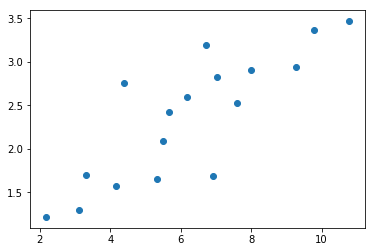

In [2]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

# plot input data
plt.scatter(train_X, train_Y)
plt.show()

In [3]:
#
# Build model
#

# x - input, single float value
# y - output, single float value
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# using linear function: y = wx + b
# add variables for w and b
w = tf.Variable(tf.random_uniform([1]))
b = tf.Variable(tf.random_uniform([1]))
output = tf.add(tf.multiply(x, w), b)

In [4]:
#
# Train model
#

# cost function is a error between y (known result) and output (predicted)
cost = tf.losses.mean_squared_error(y, output)

# use gradient descent with 0.01 training step
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

# run training session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_history = []
for epoch in range(10):
    sess.run(optimizer, feed_dict={x:train_X, y:train_Y})
    cost_history.append( sess.run(cost, feed_dict={x:train_X, y:train_Y}) )

print("W=", sess.run(w), "b=", sess.run(b))

('W=', array([0.2833659], dtype=float32), 'b=', array([0.573843], dtype=float32))


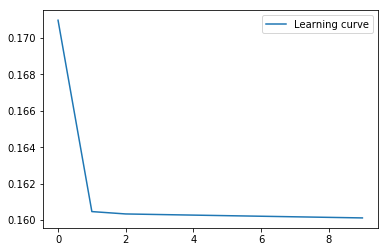

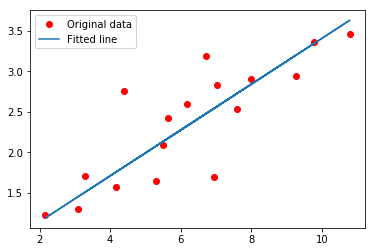

In [5]:
# plot learning curve
plt.plot(cost_history, label='Learning curve')
plt.legend()
plt.show()

# Plot prediction line
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, sess.run(output, feed_dict={x: train_X}), label='Fitted line')
plt.legend()
plt.show()